## INSTALACIÓN DE PAQUETES

#### Instalación del paquete para poder realizar la técnica de smote ya que no viene instalada. 

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


#### Instalación del paquete para poder realizar la gráfica del árbol de decisión ya que no viene instalada. 

In [2]:
pip install graphviz

#### Importar las librerías con las que voy a trabajar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

## LECTURA DE FICHEROS

In [4]:
#Leer el fichero y ver los datos (Marketing Analytics) para saber con que datos voy a trabajar. A comparación con la otra
#base de datos (todas parten de los mismos datos pero una selecciona unas variables y otra otras) esta tiene menos variables
#pero tiene la de country.
datos = pd.read_csv("E:\\Master\\TFM\\marketing_data.csv", sep=",")
datos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [5]:
#Para conocer las columnas que hay en total en el conjunto de datos
nombres_columnas = datos.columns
print(nombres_columnas)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [6]:
#Para saber el tipo de dato con el que se va a trabajar
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
#estos datos(marketing campaign) tienen dos columnas que la otra base de datos no tiene, le falta la columna country. 
datos1= pd.read_csv("E:\\Master\\TFM\\marketing_campaign.csv", sep="\t")
datos1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
#Para comprobar el tipo de dato
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## TRATAMIENTO DE LA BASE DE DATOS

#### UNIFICACIÓN DE AMBAS BASES

In [9]:
# Antes de tratar los datos, se ha realizado una unificación de bases para que la que se va a utilziar tenga todas las columnas
# Combinación de las bases de datos en función de la columna ID, que es la clave primaria qu los une y se ha añadido al final
combinacion= pd.merge(datos1, datos[['ID', 'Country']], on='ID', how='left')

# Se copia la columna Country de la base de datos original a la nueva base de datos
datos1['Country'] = combinacion['Country']

# Guardado de la nueva base de datos en un archivo CSV
datos1.to_csv('nueva.csv', index=False)

In [10]:
# Para comprobar que todo se ha guardado correctamente y que están bien los datos que se van a utilizar
combinacion

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Country
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,SA


In [11]:
#Visualizar la base de datos combinada con la cual vamos a trabajar
datos2= pd.read_csv("E:\\Master\\TFM\\nueva.csv", sep=",")
datos2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Country
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,SA


In [12]:
#Para saber la cantidad de datos y variables que tiene la base de datos
datos2.shape

(2240, 30)

In [13]:
# Comprobación de nuevo de las columnas para saber que se ha unificado bien
nombres_columnas = datos2.columns
print(nombres_columnas)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Country'],
      dtype='object')


In [14]:
datos2.info()
#Son todos números enteros menos los ingresos que son numeros decimales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### LIMPIEZA ESTADO CIVIL

In [16]:
#Cambio de los nombres de las variables del inglés al español, ya que toda la investigación va a ser en español
varespañol={'ID': 'Identificador', 'Year_Birth': 'Cumpleaños', 'Education': 'Educacion', 'Marital_Status':'Estadocivil', 'Income': 'Ingresos', 'Kidhome':'Niños',
       'Teenhome': 'Adolescentes', 'Dt_Customer': 'Inscripcion', 'Recency':'Ultimacompra', 'MntWines': 'Totalvinos', 'MntFruits': 'Totalfrutas',
       'MntMeatProducts': 'Totalcarnes', 'MntFishProducts':'Totalpescados', 'MntSweetProducts':'Totaldulces',
       'MntGoldProds':'Totallujos', 'NumDealsPurchases':'Comprasdescuentos', 'NumWebPurchases':'Comprasweb',
       'NumCatalogPurchases':'Comprascatalogo', 'NumStorePurchases':'Comprastiendas', 'NumWebVisitsMonth':'Visitaswebmes',
       'AcceptedCmp3':'Campaña3', 'AcceptedCmp4':'Campaña4', 'AcceptedCmp5':'Campaña5', 'AcceptedCmp1':'Campaña1',
       'AcceptedCmp2':'Campaña2', 'Complain':'Quejas', 'Z_CostContact':'Zcostecontacto', 'Z_Revenue':'Zingresos', 'Response':'Respuesta',
       'Country':'Pais'}
datos2= datos2.rename(columns=varespañol)

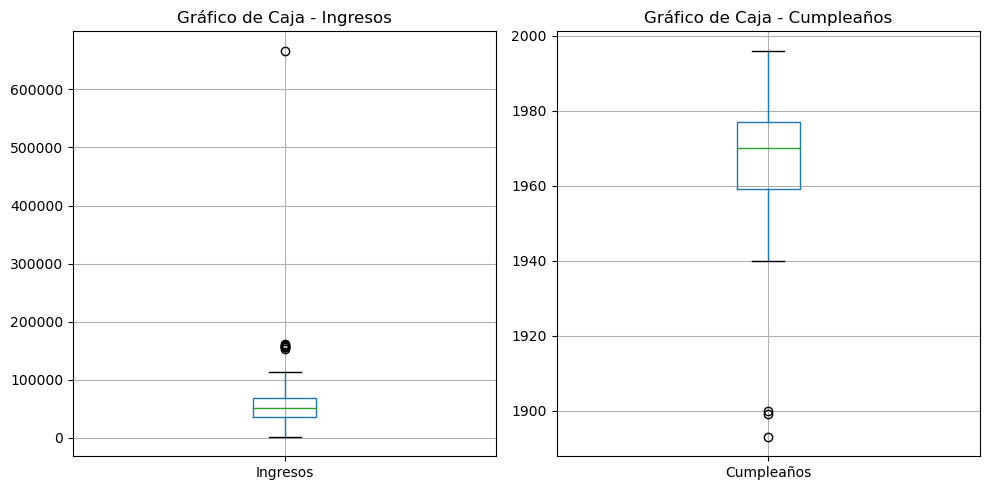

In [18]:
# Crear los gráficos de caja
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

datos2.boxplot(column='Ingresos', ax=axes[0])
axes[0].set_title('Gráfico de Caja - Ingresos')

datos2.boxplot(column='Cumpleaños', ax=axes[1])
axes[1].set_title('Gráfico de Caja - Cumpleaños')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [19]:
#Para ver si se han cambiado bien las variables
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Identificador      2240 non-null   int64  
 1   Cumpleaños         2240 non-null   int64  
 2   Educacion          2240 non-null   object 
 3   Estadocivil        2240 non-null   object 
 4   Ingresos           2216 non-null   float64
 5   Niños              2240 non-null   int64  
 6   Adolescentes       2240 non-null   int64  
 7   Inscripcion        2240 non-null   object 
 8   Ultimacompra       2240 non-null   int64  
 9   Totalvinos         2240 non-null   int64  
 10  Totalfrutas        2240 non-null   int64  
 11  Totalcarnes        2240 non-null   int64  
 12  Totalpescados      2240 non-null   int64  
 13  Totaldulces        2240 non-null   int64  
 14  Totallujos         2240 non-null   int64  
 15  Comprasdescuentos  2240 non-null   int64  
 16  Comprasweb         2240 

In [20]:
#Comprobación de las variables categóricas (Estado civil) para saber si las respuestas son correctas o hay algún error
#tengo que cambiar en la columna de estado civil el alone por single.
datos2.groupby("Estadocivil").describe().index


Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Estadocivil')

In [21]:
#Cambio de respuestas que significan lo mismo para unificarlas en una
datos3= datos2.replace(['Absurd','Alone','YOLO'], 'Single')

In [ ]:
#Para cambiar el nombre de las respuestas categóricas de inglés al español

datos3['Estadocivil'] = datos3['Estadocivil'].replace('Divorced', 'Divorciado')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Single', 'Soltero')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Married', 'Casado')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Widow', 'Viudo')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Together', 'Parejadehecho')

In [ ]:
#Comprobación de que no queda ninguna instancia mal o en inglés
datos3.groupby("Estadocivil").describe().index

In [ ]:
# Comprobraciñon general de los datos
datos3

#### LIMPIEZA EDUCACIÓN

In [ ]:
# Comprobación de que los datos categóricos de la variable eduación son correctos
datos3.groupby("Educacion").describe().index

In [ ]:
# Se reemplaza el 2 ciclo por master ya que significan lo mismo
datos4= datos3.replace(['2n Cycle'], 'Master')

In [ ]:
# Descripción de la variable educación para saber que se ha cambiado correctamente la instancia
datos4.groupby("Educacion").describe().index

In [ ]:
#Para cambiar el nombre de las respuestas categóricas de inglés al español

datos4['Educacion'] = datos4['Educacion'].replace('Basic', 'Basico')
datos4['Educacion'] = datos4['Educacion'].replace('Graduation', 'Graduado')

In [ ]:
# Comprobación general de los datos para saber que están bien
datos4

#### LIMPIEZA DE NULOS

In [ ]:
#para saber en qué columna hay valores nulos
datos4.isnull().any()

In [ ]:
#Para saber el número total de datos nulos que hay por columna
datos4.isnull().sum()

In [ ]:
#Para saber la media de los valores de cada columna
datos4.mean(axis=0)

In [ ]:
#Para rellenar los datos nulos con la media de la columna ingresos.
media= datos4['Ingresos'].mean()
datos4['Ingresos'] = datos4['Ingresos'].fillna(media)

In [ ]:
#Volvemos a comprobar que no hay ningún valor nulo.
datos4.isnull().sum()

### COMPROBACIÓN DE ERRORES

In [ ]:
#Para sacar los estadísticos
datos4.describe()

#### LIMPIEZA DE LA VARIABLE CUMPLEAÑOS

In [ ]:
#Comprobar los valores unicos ya que se ha comprobado con el describe que hay un valor extraño
datos4['Cumpleaños'].unique()

In [ ]:
#Como hay 3 valores en años que están mal ya que no sigue la media del resto, se intuye que o son anormales o se han introducido
#incorrectamente a la hora de rellenar los datos. Por ello, se van a reemplazar por la media de los datos en vez de eliminarlos.
datos4['Cumpleaños'] = datos4['Cumpleaños'].replace(1893, 1969)
datos4['Cumpleaños'] = datos4['Cumpleaños'].replace(1900, 1969)
datos4['Cumpleaños'] = datos4['Cumpleaños'].replace(1899, 1969)

In [ ]:
#Comprobar que los datos se han limpiado correctamente
datos4['Cumpleaños'].unique()

#### LIMPIEZA DE LA VARIABLE INGRESOS

In [ ]:
#Para ver cual es el mayor dato que se habia comprobado previamente con el describe
datos4['Ingresos'].max()

In [ ]:
#Como hay un valor en los ingresos que no sigue la media de los demas: un ingreso de 666.666€, se intuye que es anormal o que
#se ha introducido incorrectamente a la hora de rellenar los datos. Por ello, se va a reemplazar por la media de los datos
#en vez de eliminarlo
datos4['Ingresos']= datos4['Ingresos'].replace(666666.0, 52247.251354)

In [ ]:
#comprobar que se ha limpiado bien observando el numero máximo
datos4['Ingresos'].max()

In [ ]:
#Comprobar que no hay más datos erróneos
datos4['Ingresos'].unique()

## GUARDADO DE ARCHIVOS

In [ ]:
#Guardado del csv de la base de datos tratada y con la cual se va a trabajar
datos4.to_csv('ARCHIVOTRATADO.csv', sep=';')

In [ ]:
#Guardado de la base de datos sin tratar por si más adelante se necesita
datos.to_csv('ARCHIVO2.csv', sep=';')

## ANÁLISIS ESTADÍSTICO VARIABLES CUANTITATIVAS

In [ ]:
#Descripción estadistica traspuesta para pasar al documento
datos4.describe().T

#### COMPROBACIÓN DE INGRESOS

In [ ]:
#Como se ha limpiado antes esta variable, se ordena de mayor a menor para acabar de comprobar
datos4.sort_values(by=['Ingresos'], ascending=False)

In [ ]:
#Histograma de la variable ingresos
datos4['Ingresos'].plot(kind='hist', cmap='Set3')
plt.xlabel('Cantidad de ingresos')
plt.ylabel('Frecuencia')
plt.show()

#### CONVERSION DE DT CUSTOMER(INSCRIPCION) PARA SACAR EL AÑO DE LOS CLIENTES

In [ ]:
import warnings

# Filtrar las advertencias para que el código no quede con 30 páginas de mensaje
warnings.filterwarnings("ignore", category=UserWarning, message="Parsing .* in DD/MM/YYYY format.*")

#Convertir la variable inscripción que es tipo objeto a fecha para poder manipularla luego
datos4['Inscripcion'] = pd.to_datetime(datos4['Inscripcion'])

# Para que vuelvan a saltar
warnings.resetwarnings()

In [ ]:
#Comprobración de que se ha transformado bien la variable a datetime
datos4.info()

In [ ]:
# Comprobación de todos los datos en formato tabla
datos4

In [ ]:
#Como no interesa tratar los datos con el año de nacimiento se crea una columna que sean los años
datos4["añocompra"] = datos4["Inscripcion"].dt.year
datos4["añocompra"]
datos4["años"]= datos4["añocompra"] - datos4['Cumpleaños']
datos4["años"]

In [ ]:
#Comprobación de que se ha creado la columna correspondiente
datos4.info()

In [ ]:
#Histograma para ver la edad de los consumidores
datos4['años'].plot(kind='hist', cmap='Set3')
plt.xlabel('Edad de los consumidores')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Datos estadísticos con la edad de los consumidores y no el año de nacimiento
datos4['años'].describe()

#### ANALIZAR EL TOTAL DE GASTO DE LOS CLIENTES

In [ ]:
#Creación de una variable con el total del gasto de los distintos productos
datos4['Totalgasto']= datos4.loc[:, ['Totalvinos', 'Totalfrutas',
      'Totalcarnes', 'Totalpescados', 'Totaldulces',
       'Totallujos']].sum(axis=1)
datos4['Totalgasto']

In [ ]:
#Histograma del total de gasto
datos4['Totalgasto'].plot(kind='hist', cmap='Set3')
plt.xlabel('Total de gasto')
plt.ylabel('Frecuencia')
plt.show()

#### ANALIZAR EL NUMERO TOTAL DE HIJOS

In [ ]:
# Gráfico de barras de los niños que hay en cada familia de los consumidores
datos4['Niños'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Número de hijos pequeños')
plt.ylabel('Frecuencia ')

In [ ]:
# Gráfica de barra de los adolescentes que hay en cada familia de los consumidores
datos4['Adolescentes'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Número de hijos adolescentes')
plt.ylabel('Frecuencia')

In [ ]:
# Creación de una nueva variable del total de hijos que tienen los consumidores
datos4['Totalhijos']= datos4.loc[:, ['Niños', 'Adolescentes']].sum(axis=1)
datos4['Totalhijos']

In [ ]:
# Representación gráfica de los hijos totales que hay en la familia de los consumidores
datos4['Totalhijos'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Número de hijos por consumidor')
plt.ylabel('Total de número de hijos')

##### ANÁLISIS INDIVIDUAL DE COMPRA

In [ ]:
# Representación del gasto medio de cada tipo de compra
columnas_loc = datos4.loc[:, ['Totalvinos', 'Totalfrutas',
       'Totalcarnes', 'Totalpescados', 'Totaldulces',
       'Totallujos']]
medias = columnas_loc.mean()
medias.plot.bar( cmap='Set3')
plt.xlabel('Tipo de compra')
plt.ylabel('Total de gasto')
plt.show()

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
columnas_loc = datos4.loc[:, ['Totalvinos', 'Totalfrutas',
       'Totalcarnes', 'Totalpescados', 'Totaldulces',
       'Totallujos']]
medias = columnas_loc.mean()
desfase=(0,0,0.1,0,0,0)
medias.plot.pie( cmap='Set3',  autopct="%0.1f %%", explode=desfase)
plt.xlabel('Gastos')
plt.ylabel('    ')
plt.show()

In [ ]:
# ordenado descendente
educacion=datos4.groupby(['años'])['Totallujos'].mean()
educacion.sort_values(ascending=False)

In [ ]:
vinos=datos4.groupby(['Educacion'])['Totallujos'].apply(lambda x: x.mode())
vinos.sort_values(ascending=False)

In [ ]:
# Representación del gasto en vino de los consumidores 
datos4['Totalvinos'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en vino')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Representación del gasto en fruta de los consumidores 
datos4['Totalfrutas'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en frutas')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Representación del gasto en carne de los consumidores 
datos4['Totalcarnes'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en carnes')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Representación del gasto en dulces de los consumidores 
datos4['Totaldulces'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en dulces')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Representación del gasto en lujos de los consumidores 
datos4['Totallujos'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en lujos')
plt.ylabel('Frecuencia')
plt.show()

#### Análisis de la aceptación de las campañas

In [ ]:
# Representación de aceptación de la campaña 1 
datos4['Campaña1'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña1'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

In [ ]:
# Representación de aceptación de la campaña 2 
datos4['Campaña2'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña2'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

In [ ]:
# Representación de aceptación de la campaña 3 
datos4['Campaña3'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña3'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

In [ ]:
# Representación de aceptación de la campaña 4
datos4['Campaña4'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña4'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

In [ ]:
# Representación de aceptación de la campaña 5 
datos4['Campaña5'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña5'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Escogemos las columnas de las campañas
columnas = ['Campaña1', 'Campaña2', 'Campaña3', 'Campaña4', 'Campaña5']

# Crear los subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

# Generar las gráficas en bucle
for i, columna in enumerate(columnas):
    datos4[columna].value_counts().plot.pie(
        rot=0, cmap='Set3', autopct="%0.1f %%", ax=axs[i])
    axs[i].set_title(columna)

# Ajustar los espacios 
plt.tight_layout()
plt.show()


#### Análisis tipos de compras

In [ ]:
# Comprobación de los valores únicos que hay de las cantidades de compras con descuentos
datos4['Comprasdescuentos'].unique()

In [ ]:
# Representación gráfica de las cantidades de compras con descuentos que se realizan  y su frecuencia
datos4['Comprasdescuentos'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras por descuentos')
plt.ylabel('Frecuencia')

In [ ]:
# Comprobación de los valores únicos que hay de las cantidades de compras en web
datos4['Comprasweb'].unique()

In [ ]:
# Representación gráfica de las cantidades de compras por web que se realizan y su frecuencia
datos4['Comprasweb'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras por web')
plt.ylabel('Frecuencia')

In [ ]:
# Comprobación de los valores únicos que hay de las cantidades de compras en catálogo
datos4['Comprascatalogo'].unique()

In [ ]:
# Representación gráfica de las cantidades de compras por catálogo que se realizan y su frecuencia
datos4['Comprascatalogo'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras por catalogo')
plt.ylabel('Frecuencia')

In [ ]:
# Comprobación de los valores únicos que hay de las cantidades de compras en tienda
datos4['Comprastiendas'].unique()

In [ ]:
# Representación gráfica de las cantidades de compras en tienda que se realizan y su frecuencia
datos4['Comprastiendas'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras en tiendas')
plt.ylabel('Frecuencia')

In [ ]:
# Comprobación de los valores únicos que hay devisitas a la web
datos4['Visitaswebmes'].unique()

In [ ]:
# Representación gráfica de las cantidades de visitas a la web y su frecuencia
datos4['Visitaswebmes'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de visitas web')
plt.ylabel('Frecuencia')

## ANÁLISIS ESTADÍSTICO DE LAS VARIABLES CATEGÓRICAS

In [ ]:
# Descripción estadística de las variables categóricas
datos4[['Educacion','Estadocivil','Pais']].describe()

#### Variable educación con distintas variables

In [ ]:
# Agrupar por variables cualitativas y calcular la media de ingresos
datos4.groupby(['Educacion'])['Ingresos'].mean()


In [ ]:
# ordenado descendente
educacion=datos4.groupby(['Educacion'])['Respuesta'].mean()
educacion.sort_values(ascending=False)

In [ ]:
datos4.groupby(['Niños'])['Educacion'].apply(lambda x: x.mode())

In [ ]:
# ordenado descendente
educacion=datos4.groupby(['Educacion'])['Niños'].mean()
educacion.sort_values(ascending=False)

In [ ]:
datos4.groupby(['Adolescentes'])['Educacion'].apply(lambda x: x.mode())

In [ ]:
# ordenado descendente
educacion=datos4.groupby(['Educacion'])['Adolescentes'].mean()
educacion.sort_values(ascending=False)

#### Estado civil con distintas variables

In [ ]:
# Agrupar por variables cualitativas y calcular la media de ingresos
#ordenado descendente
civil2= datos4.groupby(['Estadocivil'])['Ingresos'].mean()
civil2.sort_values(ascending=False)

In [ ]:
# Agrupar por variables cualitativas y calcular la media de respuesta
civil=datos4.groupby(['Estadocivil'])['Respuesta'].mean()
civil.sort_values(ascending=False)

In [ ]:
# ordenado descendente
educacion=datos4.groupby(['Estadocivil'])['Niños'].mean()
educacion.sort_values(ascending=False)

In [ ]:
datos4.groupby(['Niños'])['Estadocivil'].apply(lambda x: x.mode())

In [ ]:
# ordenado descendente
educacion=datos4.groupby(['Estadocivil'])['Adolescentes'].mean()
educacion.sort_values(ascending=False)

In [ ]:
datos4.groupby(['Adolescentes'])['Estadocivil'].apply(lambda x: x.mode())

#### País con distintas variables

In [ ]:
# Agrupar por variables cualitativas y calcular la moda de respuesta
datos4.groupby(['Pais'])['Respuesta'].apply(lambda x: x.mode())


In [ ]:
# Agrupar por variables cualitativas y calcular la media de respuesta
pais= datos4.groupby(['Pais'])['Respuesta'].mean()
pais.sort_values(ascending=False)

In [ ]:
# Agrupar por variables cualitativas y calcular la media de ingresos
pais= datos4.groupby(['Pais'])['Ingresos'].mean()
pais.sort_values(ascending=False)

In [ ]:
datos4.groupby(['Adolescentes'])['Pais'].apply(lambda x: x.mode())

In [ ]:
# ordenado descendente
educacion=datos4.groupby(['Pais'])['Adolescentes'].mean()
educacion.sort_values(ascending=False)

In [ ]:
datos4.groupby(['Niños'])['Pais'].apply(lambda x: x.mode())

In [ ]:
educacion=datos4.groupby(['Pais'])['Niños'].mean()
educacion.sort_values(ascending=False)

#### Años con otras variables

In [ ]:
# Agrupar por variables cualitativas y calcular la media de respuesta
años= datos4.groupby(['años'])['Respuesta'].mean()
años.sort_values(ascending=False)

In [ ]:
datos4['años'].sort_values(ascending=False)

In [ ]:
#Agrupar por variables cualitativas y calcular la media de ingresos
años= datos4.groupby(['años'])['Ingresos'].mean()
años.sort_values(ascending=False)

In [ ]:
ordenar= datos4.groupby(['años'])['Ingresos'].apply(lambda x: x.mode())
ordenar.sort_values(ascending=False)

#### ANÁLISIS DE LAS VARIABLES

In [ ]:
# Representación en barras de la frecuencia de las instancias de la variable estado civil
datos4['Estadocivil'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Tipo de estado civil')
plt.ylabel('Frecuencia ')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0, 0, 0, 0)
datos4['Estadocivil'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

In [ ]:
# Representación en barras de la frecuencia de las instancias de la variable educación
datos4['Educacion'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Tipo de educación')
plt.ylabel('Frecuencia ')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0, 0.1, 0, 0)
datos4['Educacion'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)


In [ ]:
# Representación en barras de la frecuencia de las instancias de la variable pais
datos4['Pais'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Pais del consumidor')
plt.ylabel('Frecuencia ')

In [ ]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0, 0, 0, 0,0,0,0.1,0)
datos4['Pais'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

#### ANÁLISIS CORRELACIÓN

In [ ]:
# Creación de la matriz de correlación de todas las variables
correlacion=datos4.corr()
datos4.corr()

In [ ]:
# Representación gráfica de la matriz de correlación
sns.heatmap(correlacion, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
#hay dos datos: z_revenue(Zingresos) y z_costcontact(Zcostecontacto), que solo tiene el mismo resultado. 
#No se sabe a que hace referencia. 
datos4['Zingresos']
datos4['Zcostecontacto']

## REALIZACIÓN DE MACHINE LEARNING

In [ ]:
# Análisis de la variable salida para ver si está balanceado o no
datos4['Respuesta'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Tipo de respuesta')
plt.ylabel('Número de respuesta')

In [ ]:
# Apertura del archivo del conjunto de datos ya limpiado
datos5= pd.read_csv("ARCHIVOTRATADO.csv", sep=";")

In [ ]:
# Codificar las variables categóricas con la técnica one-hot para volverlas dummies
data = pd.get_dummies(datos5, columns=['Educacion','Estadocivil','Pais', 'Inscripcion'])

# Separar las variables predictoras y la variable objetivo
X = data.drop('Respuesta', axis=1)
y = data['Respuesta']

# Aplicar la técnica SMOTE para balancear las clases
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

#Para saber como está estratificada
print("Tamaño del conjunto x_train :", X_train.shape)
print("Tamaño del conjunto y_train :", y_train.shape)
print("Tamaño del conjunto x_test :", X_test.shape)
print("Tamaño del conjunto y_test :", y_test.shape)



## ARBOL DE DECISIÓN

(Clasificación: si el objetivo es predecir si un cliente realizará una compra o no, se puede aplicar un algoritmo de clasificación, como árboles de decisión, regresión logística o SVM.
Agrupamiento: si se desea identificar patrones en los datos sin tener una variable objetivo definida, se puede aplicar un algoritmo de agrupamiento, como k-means o clustering jerárquico.)

In [ ]:
#Creamos primero la estructura del árbol 
#y la entrenamos con los conjuntos de entrenamiento de las variables predictoras y la respuesta.

arb = tree.DecisionTreeClassifier()
arbol = arb.fit(X_train, y_train)

#### Matriz de Confusión

In [ ]:
#Realizamos la predicción
y_pred = arbol.predict(X_test)

# Evaluamos el modelo
print("% de acierto en el conjunto de entrenamiento: ", arbol.score(X_train, y_train))
print("% de acierto en el conjunto de test: ", arbol.score(X_test, y_test))

#Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Precisión sin poda:", accuracy)

In [ ]:
# creación de la matriz de confusión
metrics.confusion_matrix(y_test, y_pred)

In [ ]:
# Cálculo de todas las métricas
classReport = metrics.classification_report(y_test, y_pred)
print(classReport)

#### AUC

In [ ]:
print(f'AUC del modelo Árbol: {roc_auc_score(y_test, y_pred)}')
#En la práctica, un valor de AUC de alrededor de 0.7 a 0.8 se considera aceptable en muchos problemas, 
#mientras que un valor superior a 0.9 se considera excelente. Sin embargo, el valor óptimo de AUC puede variar dependiendo 
#del contexto del problema y de las implicaciones prácticas de la clasificación incorrecta de las instancias.

In [ ]:
# Para la creación de la curva roc de forma gráfica
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
# Inicio del código para la creación del árbol de decisión de forma gráfica
import os

# Obtener el valor actual de la variable de entorno PATH
current_path = os.environ.get('PATH', '')

# Agregar la ruta de Graphviz al PATH
graphviz_path = r'C:\Program Files\Graphviz\bin'
new_path = f'{current_path};{graphviz_path}'

# Actualización de la variable de entorno PATH
os.environ['PATH'] = new_path

In [ ]:
# Código en sí de la creación del árbol de decisión

# Obtener los nombres de las características y las clases
feature_names = data.columns[:-1].tolist()  # Para obtener los nombres de las características (excepto la última)
target_names = data.iloc[:, -1].astype(str).unique().tolist() 

# Crear la representación del árbol de decisión en formato DOT
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)

# Generar el gráfico del árbol de decisión usando la libreria Graphviz
graph = graphviz.Source(dot_data)
graph.render("mkt_decision_tree")  #para guardarlo

# Visualizar el gráfico
graph.view()

#### Poda con cross validation

In [ ]:
#Comprobación del accuracy del modelo por si al realizar una técnica de poda arroja un mejor modelo que sin ella

#primero creamos la estructura del arbol
arb2 = tree.DecisionTreeClassifier()

# Realizar la poda de Cross Validation
scores = cross_val_score(arb2, X, y, cv=5)  # cv indica el número de divisiones en Cross Validation

# Imprimir los puntajes de precisión de cada división
print("Precisión por división:", scores)

# Ajustar el modelo utilizando los datos de entrenamiento
arbol2 = arb2.fit(X_train, y_train)
#Realizamos la predicción
y_pred = arbol2.predict(X_test)

# Evaluamos el modelo
print("% de acierto en el conjunto de entrenamiento: ", arbol2.score(X_train, y_train))
print("% de acierto en el conjunto de test: ", arbol2.score(X_test, y_test))

#Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Precisión con poda:", accuracy)

In [ ]:
# creación de la matriz de confusión
metrics.confusion_matrix(y_test, y_pred)

In [ ]:
# Cálculo de todas las métricas
classReport = metrics.classification_report(y_test, y_pred)
print(classReport)

In [ ]:
print(f'AUC del modelo Árbol: {roc_auc_score(y_test, y_pred)}')
#En la práctica, un valor de AUC de alrededor de 0.7 a 0.8 se considera aceptable en muchos problemas, 
#mientras que un valor superior a 0.9 se considera excelente. Sin embargo, el valor óptimo de AUC puede variar dependiendo 
#del contexto del problema y de las implicaciones prácticas de la clasificación incorrecta de las instancias.

In [ ]:
# Creación de la gráfica curva roc para un arbol podado
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
# Creación del arbol de decisión y sus pasos para guardarlo

# Obtemer los nombres de las características y las clases
feature_names = data.columns[:-1].tolist()  # Obtener los nombres de las características (excepto la última)
target_names = data.iloc[:, -1].astype(str).unique().tolist() 

# Crear la representación del árbol de decisión en formato DOT
dot_data = tree.export_graphviz(arbol2, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)

# Generar el gráfico del árbol de decisión usando Graphviz
graph = graphviz.Source(dot_data)
graph.render("mkt_decision_tree_crossvalidation")  # Guardado del árbol

# Visualizar el gráfico 
graph.view()

#### KNN

In [ ]:
#Creación de un knn por el simple hecho de comprobar que modelo daba un mejor ajuste
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

In [ ]:
# Comprobación de todas las métricas
classReport2 = metrics.classification_report(y_test, y_pred)
print(classReport2)

## CLUSTER

In [ ]:
# Método de codo para saber cual es el nñumero óptimo de kmeans a utilizar

# Seleccioanr los datos
datos7 = pd.read_csv("ARCHIVOTRATADO.csv", sep=";")

# Codificar las variables categóricas con la técnica one-hot
data = pd.get_dummies(datos7, columns=['Educacion','Estadocivil','Pais', 'Inscripcion'])

# Seleccionar columnas numéricas relevantes para el análisis
X= data.select_dtypes(include=['int', 'float'])


# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar la suma de los cuadrados de las distancias en función del número de clusters
hex='#8dd3c7'
plt.plot(range(1, 15), sse, marker='o', color=hex , markersize=3)
plt.xlabel('Número de clusters')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.show()

In [ ]:
#estudio de centroides de los cluster para crear los cluster

# Datos de entrada
datos8 = pd.read_csv("ARCHIVOTRATADO.csv", sep=";")
# Codificar las variables categóricas con la técnica one-hot
data = pd.get_dummies(datos8, columns=['Educacion','Estadocivil','Pais', 'Inscripcion'])

# Seleccionar columnas numéricas relevantes para el análisis
X= data.select_dtypes(include=['int', 'float'])

# Crear un objeto KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenar el modelo con los datos de entrada
kmeans.fit(X)

# Imprimir las etiquetas de los clusters para cada ejemplo
print(kmeans.labels_)

# Imprimir las coordenadas de los centroides de los clusters
print(kmeans.cluster_centers_)

In [ ]:
#Saber que tipo de datos son los que resultan del modelo
data.info()

In [ ]:
# comprobar las columnas que hay con las dummies
data.columns

In [ ]:
#comprobación de las columnas sn las dummies
X.columns

In [ ]:
# Gráfico de dispersión de los cluster
# Asignar cada observación al cluster correspondiente
labels = kmeans.predict(X)

# Visualizar clusters en una gráfica de dispersión
plt.scatter(X['Ingresos'], X['Respuesta'], c=labels, cmap='Set3')
plt.xlabel('Ingresos familiares')
plt.ylabel('Gasto total en vino')
plt.title('Scatter plot: Ingresos vs Totalvinos')

In [ ]:
# Métrica de silueta para comprobar si el cluster es bueno o no. Se evalua de 0 a 1.

# X es la matriz de características
# labels es una lista o array que contiene las etiquetas de clúster asignadas a cada muestra

silhouette_avg = silhouette_score(X, labels)
print("El índice de silueta promedio es:", silhouette_avg)


In [ ]:
# Indice intracluster para evaluar la distancia de los datos
# X es la matriz de características 
# num_clusters es el número de clústeres a evaluar

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

wcss = kmeans.inertia_
print("La suma de las distancias cuadradas intraclúster es:", wcss)

In [ ]:
# Indice itnercluster para evaluar la distancia de los datos
# Obtener los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Calcula la distancia euclidiana entre los centroides
distance = np.linalg.norm(centroids[0] - centroids[1])

print("La distancia interclúster es:", distance)

In [ ]:
# Código para sacar los datos de cada variable agrupado por cluster

# Obtener las etiquetas de cluster asignadas a cada muestra
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame
X['cluster_label'] = labels

# Crear un diccionario para almacenar los datos de cada cluster
cluster_data = {}
for label in set(labels):
    cluster_data[label] = X[X['cluster_label'] == label].drop('cluster_label', axis=1)

# Imprimir los datos de cada cluster
for label, cluster in cluster_data.items():
    print("Cluster", label)
    print(cluster)
    print()

In [ ]:
# Aqui ya se agrupan por cluster y se pueden evaluar los distintos grupos
clustermedia= X.groupby('cluster_label').mean().T
clustermedia

In [ ]:
# Calcular los valores más frecuentes de las variables categóricas en cada cluster
clustermoda = X.groupby('cluster_label').agg(lambda x: x.value_counts().index[0]).T
clustermoda

In [ ]:
# saber las variables que hay en los cluster
X.columns

In [ ]:
#Comprobación de las variables categóricas dentro de los cluster

# Agregar las etiquetas de cluster al conjunto de datos
data['Cluster'] = labels

# Iterar sobre cada cluster y obtener las variables dummy para ese cluster
for cluster in range(3):  
    cluster_data = data[data['Cluster'] == cluster]
    cluster_dummies = cluster_data.filter(like='Pais')  
    
    print(f"Cluster {cluster} - Variables dummy:")
    print(cluster_dummies.head().sum())
    print()

In [ ]:
#Comprobación de las variables categóricas dentro de los cluster

# Agregar las etiquetas de cluster al conjunto de datos
data['Cluster'] = labels

# Iterar sobre cada cluster y obtener las variables dummy para ese cluster
for cluster in range(3): 
    cluster_data = data[data['Cluster'] == cluster]
    cluster_dummies = cluster_data.filter(like='Educacion')  
    
    print(f"Cluster {cluster} - Variables dummy:")
    print(cluster_dummies.head().sum())
    print()

In [ ]:
#Comprobación de las variables categóricas dentro de los cluster

# Agregar las etiquetas de cluster al conjunto de datos
data['Cluster'] = labels

# Iterar sobre cada cluster y obtener las variables dummy para ese cluster
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    cluster_dummies = cluster_data.filter(like='Estadocivil')  
    
    print(f"Cluster {cluster} - Variables dummy:")
    print(cluster_dummies.head().sum())
    print()

#### Gráficas de dispersión sin cluster

# Bucle para que python itere cada variable con otra para crear los gráficos de dispersión y no ir haciendolo poco a poco

import os
# Obtener la lista de nombres de columnas del DataFrame
columnas = datos7.columns

# Crear un directorio para guardar las imágenes
directorio = 'C:\\Users\\Lucia'  
os.makedirs(directorio, exist_ok=True)

# Generar scatter plots para cada variable y guardar las imágenes
for columna_x in columnas:
       for columna_y in columnas:
        # Excluir la variable si es la misma en el eje x e y
        if columna_x != columna_y:
            hex='#8dd3c7'
            plt.scatter(datos7[columna_x], datos7[columna_y], color=hex)
            plt.title('Scatter plot: {} vs {}'.format(columna_x, columna_y))
            plt.xlabel(columna_x)
            plt.ylabel(columna_y)
            
            # Guardar la imagen en un archivo en el directorio especificado
            ruta_imagen = os.path.join(directorio, 'scatter_{}_vs_{}.png'.format(columna_x, columna_y))
            plt.savefig(ruta_imagen)
            
            # Limpiar el gráfico para la siguiente iteración
            plt.clf()

# Notificar la finalización del proceso
print('Imágenes guardadas')

